In [3]:
from pulp import LpProblem, LpVariable, LpMaximize, LpMinimize, LpStatus, lpSum, value, LpConstraint
from pulp import PULP_CBC_CMD
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
import seaborn as sns
from  itertools import product
import math
import time
import os

In [4]:
# Read files
files = glob('../*/*recommendation/*.csv')
# print(files)
dfs, name_df = [], []
for i, file in enumerate(files):
    df_name = os.path.splitext(os.path.basename(files[i]))[0]
    name_df.append(df_name)
    df = pd.read_csv(files[i])
    dfs.append(df)
print(name_df)

['access_log']


- log_df
  -  N   Column   Non-Null Count   Dtype 
  -  0   user_id  325908 non-null  int64 
  -  1   item_id  325908 non-null  int64 
  -  2   date     325908 non-null  object
  - dtypes: int64(2), object(1)
  - Index(['user_id', 'item_id', 'date'], dtype='object')

In [5]:
log_df = dfs[0]
log_df.head(3)

,user_id,item_id,date
0,4,205587,2015-07-04
1,4,748683,2015-07-04
2,4,790055,2015-07-04


In [6]:
print(log_df['user_id'].nunique())
print(log_df['item_id'].nunique())
print(log_df['date'].unique())

31443
87611
['2015-07-04' '2015-07-05' '2015-07-01' '2015-07-03' '2015-07-06'
 '2015-07-02' '2015-07-07' '2015-07-08']


In [7]:
log_df['user_id'].value_counts().describe()

count    31443.000000
mean        10.365042
std         16.023399
min          2.000000
25%          3.000000
50%          5.000000
75%         11.000000
max        632.000000
Name: count, dtype: float64

In [8]:
log_df['item_id'].value_counts().describe()

count    87611.000000
mean         3.719944
std          8.802572
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max        941.000000
Name: count, dtype: float64

In [9]:
log_df['date'].value_counts().describe()

count        8.000000
mean     40738.500000
std       4895.105106
min      33311.000000
25%      38431.500000
50%      41868.500000
75%      44470.750000
max      45441.000000
Name: count, dtype: float64

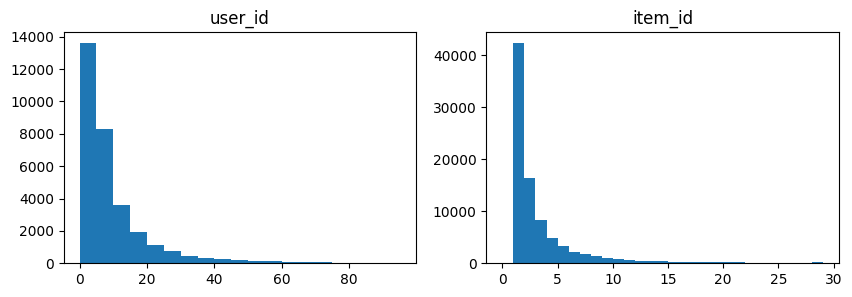

In [39]:
fig, axs = plt.subplots(1, 2, figsize=(10, 3))
axs[0].hist(log_df['user_id'].value_counts(), bins=range(0, 100, 5))
axs[0].set_title('user_id')
axs[1].hist(log_df['item_id'].value_counts(), bins=range(0, 30, 1))
axs[1].set_title('item_id')
plt.show()